### ques 1

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

# Load dataset
data = pd.read_csv("heart.csv")

# Split features and target
X = data.iloc[:, :-1]  # All columns except the last one
y = data.iloc[:, -1]   # Last column as target

# Split data: 90% train, 10% test (last 10% as test set)
train_size = int(0.9 * len(data))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# (a) Fisher Linear Discriminant
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_train_pred_lda = lda.predict(X_train)
y_test_pred_lda = lda.predict(X_test)

# (b) Quadratic Discriminant
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
y_train_pred_qda = qda.predict(X_train)
y_test_pred_qda = qda.predict(X_test)

# Calculate misclassification rates
misclassification_rate_train_lda = 1 - accuracy_score(y_train, y_train_pred_lda)
misclassification_rate_test_lda = 1 - accuracy_score(y_test, y_test_pred_lda)

misclassification_rate_train_qda = 1 - accuracy_score(y_train, y_train_pred_qda)
misclassification_rate_test_qda = 1 - accuracy_score(y_test, y_test_pred_qda)

print("Misclassification Rates:")
print(f"FLD - Training: {misclassification_rate_train_lda:.3f}, Test: {misclassification_rate_test_lda:.3f}")
print(f"QDF - Training: {misclassification_rate_train_qda:.3f}, Test: {misclassification_rate_test_qda:.3f}")


Misclassification Rates:
FLD - Training: 0.277, Test: 0.277
QDF - Training: 0.282, Test: 0.298


### ques 2

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score
import pandas as pd

# Load and clean dataset
file_path = 'currency_crisis.csv'
data = pd.read_csv(file_path)
data.columns = [
    "Date",
    "Foreign_Exchange_Reserves",
    "Foreign_Assets_vs_Liabilities",
    "Import",
    "Export",
    "Sustainable_Forex_Reserves",
    "Money_Multiplier",
    "Broad_Money_to_Reserves",
    "Real_Deposit_Rate",
    "Real_Rate_Differential",
    "Lending_to_Deposit_Rate",
    "Time_Deposits",
    "Demand_Deposits",
    "IIP",
    "Deviation_from_REER",
    "FDI",
    "Crude_Oil_Price",
    "Crisis_Indicator"
]

data = data.drop(columns=["Date"]).apply(pd.to_numeric, errors='coerce').dropna()

# Features and target
X = data.drop(columns=["Crisis_Indicator"])
y = data["Crisis_Indicator"]

# Scenario (i): Last 10% as test set
train_size = int(0.9 * len(data))
X_train_i, X_test_i = X[:train_size], X[train_size:]
y_train_i, y_test_i = y[:train_size], y[train_size:]

# Scenario (ii): Every 10th observation as test set
test_indices = range(0, len(data), 10)
train_indices = list(set(range(len(data))) - set(test_indices))
X_train_ii, X_test_ii = X.iloc[train_indices], X.iloc[test_indices]
y_train_ii, y_test_ii = y.iloc[train_indices], y.iloc[test_indices]

# Initialize models
lda = LinearDiscriminantAnalysis()
qda = QuadraticDiscriminantAnalysis()

# Fisher Linear Discriminant for Scenario (i)
lda.fit(X_train_i, y_train_i)
y_train_pred_lda_i = lda.predict(X_train_i)
y_test_pred_lda_i = lda.predict(X_test_i)

# Quadratic Discriminant for Scenario (i)
qda.fit(X_train_i, y_train_i)
y_train_pred_qda_i = qda.predict(X_train_i)
y_test_pred_qda_i = qda.predict(X_test_i)

# Fisher Linear Discriminant for Scenario (ii)
lda.fit(X_train_ii, y_train_ii)
y_train_pred_lda_ii = lda.predict(X_train_ii)
y_test_pred_lda_ii = lda.predict(X_test_ii)

# Quadratic Discriminant for Scenario (ii)
qda.fit(X_train_ii, y_train_ii)
y_train_pred_qda_ii = qda.predict(X_train_ii)
y_test_pred_qda_ii = qda.predict(X_test_ii)

# Compute misclassification rates
results = {
    "Scenario (i)": {
        "FLD": {
            "Train Misclassification": 1 - accuracy_score(y_train_i, y_train_pred_lda_i),
            "Test Misclassification": 1 - accuracy_score(y_test_i, y_test_pred_lda_i)
        },
        "QDF": {
            "Train Misclassification": 1 - accuracy_score(y_train_i, y_train_pred_qda_i),
            "Test Misclassification": 1 - accuracy_score(y_test_i, y_test_pred_qda_i)
        }
    },
    "Scenario (ii)": {
        "FLD": {
            "Train Misclassification": 1 - accuracy_score(y_train_ii, y_train_pred_lda_ii),
            "Test Misclassification": 1 - accuracy_score(y_test_ii, y_test_pred_lda_ii)
        },
        "QDF": {
            "Train Misclassification": 1 - accuracy_score(y_train_ii, y_train_pred_qda_ii),
            "Test Misclassification": 1 - accuracy_score(y_test_ii, y_test_pred_qda_ii)
        }
    }
}

# print(results)
for result,data in results.items():
    print(result)
    print(data)


Scenario (i)
{'FLD': {'Train Misclassification': 0.11290322580645162, 'Test Misclassification': 0.9523809523809523}, 'QDF': {'Train Misclassification': 0.043010752688172005, 'Test Misclassification': 0.9047619047619048}}
Scenario (ii)
{'FLD': {'Train Misclassification': 0.19354838709677424, 'Test Misclassification': 0.19047619047619047}, 'QDF': {'Train Misclassification': 0.06451612903225812, 'Test Misclassification': 0.09523809523809523}}


### ques 3

In [22]:

import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

# Load the wine dataset
wine_file_path = 'wine.csv'
wine_data = pd.read_csv(wine_file_path, header=0)

# Drop all empty 'Unnamed' columns
wine_data = wine_data.loc[:, ~wine_data.columns.str.contains('^Unnamed')]

# Prepare features and target
X = wine_data.drop(columns=["Type"])  # Keep all columns except 'Type'
y = wine_data["Type"].apply(lambda t: 1 if t == "A" else 0)  # Encode Type: A -> 1, B -> 0

# Drop rows with missing values
X_cleaned = X.dropna()
y_cleaned = y[X_cleaned.index]

# print(X_cleaned)
# print(y_cleaned)

# Split data: Last 10% as test set
train_size_cleaned = int(0.9 * len(X_cleaned))
X_train_cleaned, X_test_cleaned = X_cleaned[:train_size_cleaned], X_cleaned[train_size_cleaned:]
y_train_cleaned, y_test_cleaned = y_cleaned[:train_size_cleaned], y_cleaned[train_size_cleaned:]

# Initialize classifiers
lda = LinearDiscriminantAnalysis()
qda = QuadraticDiscriminantAnalysis()

# Fisher Linear Discriminant (FLD)
lda.fit(X_train_cleaned, y_train_cleaned)
y_train_pred_lda_cleaned = lda.predict(X_train_cleaned)
y_test_pred_lda_cleaned = lda.predict(X_test_cleaned)

# Quadratic Discriminant Function (QDF)
qda.fit(X_train_cleaned, y_train_cleaned)
y_train_pred_qda_cleaned = qda.predict(X_train_cleaned)
y_test_pred_qda_cleaned = qda.predict(X_test_cleaned)

# Calculate misclassification rates
misclassification_rates_final = {
    "FLD": {
        "Train Misclassification": 1 - accuracy_score(y_train_cleaned, y_train_pred_lda_cleaned),
        "Test Misclassification": 1 - accuracy_score(y_test_cleaned, y_test_pred_lda_cleaned)
    },
    "QDF": {
        "Train Misclassification": 1 - accuracy_score(y_train_cleaned, y_train_pred_qda_cleaned),
        "Test Misclassification": 1 - accuracy_score(y_test_cleaned, y_test_pred_qda_cleaned)
    }
}

# Print misclassification rates
print("Misclassification Rates:")
print(misclassification_rates_final)


Misclassification Rates:
{'FLD': {'Train Misclassification': 0.0, 'Test Misclassification': 0.0}, 'QDF': {'Train Misclassification': 0.0, 'Test Misclassification': 0.0}}


Misclassification Rates:
FLD
{'Train Misclassification': 0.0, 'Test Misclassification': 0.0}
QDF
{'Train Misclassification': 0.0, 'Test Misclassification': 0.0}


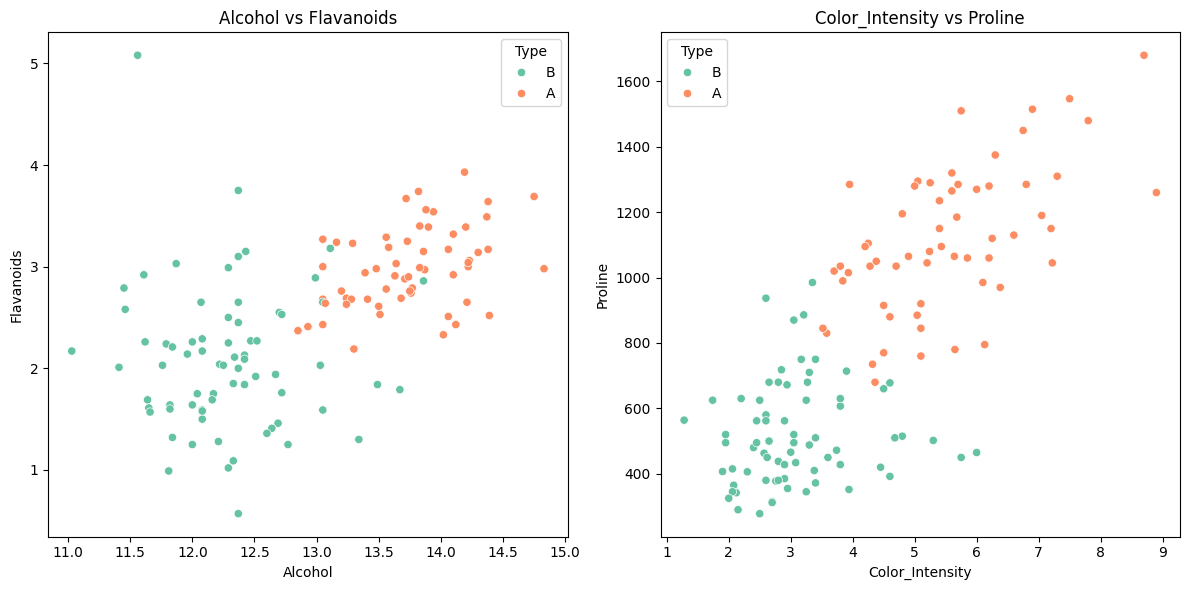

In [ ]:
# import pandas as pd
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
# from sklearn.metrics import accuracy_score
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Load the wine dataset
# wine_file_path = 'wine.csv'
# wine_data = pd.read_csv(wine_file_path)

# # Keep only relevant columns and clean data
# wine_data_cleaned = wine_data.iloc[:, :14].dropna()
# wine_data_cleaned.columns = [
#     "Type", "Alcohol", "Malic_Acid", "Ash", "Ash_Alcalinity", "Magnesium", "Total_Phenols", 
#     "Flavanoids", "Nonflavanoid_Phenols", "Proanthocyanins", "Color_Intensity", "Hue", 
#     "OD280_OD315", "Proline"
# ]

# # Prepare features and target
# X = wine_data_cleaned.drop(columns=["Type"])
# y = wine_data_cleaned["Type"].apply(lambda t: 1 if t == "A" else 0)  # Encode Type: A -> 1, B -> 0

# # Split data: Last 10% as test set
# train_size = int(0.9 * len(wine_data_cleaned))
# X_train, X_test = X[:train_size], X[train_size:]
# y_train, y_test = y[:train_size], y[train_size:]

# # Initialize classifiers
# lda = LinearDiscriminantAnalysis()
# qda = QuadraticDiscriminantAnalysis()

# # Fisher Linear Discriminant (FLD)
# lda.fit(X_train, y_train)
# y_train_pred_lda = lda.predict(X_train)
# y_test_pred_lda = lda.predict(X_test)

# # Quadratic Discriminant Function (QDF)
# qda.fit(X_train, y_train)
# y_train_pred_qda = qda.predict(X_train)
# y_test_pred_qda = qda.predict(X_test)

# # Calculate misclassification rates
# misclassification_rates = {
#     "FLD": {
#         "Train Misclassification": 1 - accuracy_score(y_train, y_train_pred_lda),
#         "Test Misclassification": 1 - accuracy_score(y_test, y_test_pred_lda)
#     },
#     "QDF": {
#         "Train Misclassification": 1 - accuracy_score(y_train, y_train_pred_qda),
#         "Test Misclassification": 1 - accuracy_score(y_test, y_test_pred_qda)
#     }
# }

# # Print results
# print("Misclassification Rates:")
# # print(misclassification_rates)
# for item, value in misclassification_rates.items():
#     print(item)
#     print(value)

# # Visualize feature separability with scatter plots
# plt.figure(figsize=(12, 6))
# for i, (feat1, feat2) in enumerate([("Alcohol", "Flavanoids"), ("Color_Intensity", "Proline")], 1):
#     plt.subplot(1, 2, i)
#     sns.scatterplot(data=wine_data_cleaned, x=feat1, y=feat2, hue="Type", palette="Set2")
#     plt.title(f"{feat1} vs {feat2}")
#     plt.xlabel(feat1)
#     plt.ylabel(feat2)

# plt.tight_layout()
# plt.show()
